In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]
print(y_probs)

[8.78761734e-01 3.03624981e-08 1.59490988e-03 9.98786462e-01
 9.99860203e-01 1.94458720e-10 6.09483521e-11 1.92268979e-02
 9.84147966e-01 9.94369705e-01 9.29567876e-01 8.06714616e-04
 9.88982871e-01 1.75825070e-01 9.99220747e-01 1.72757217e-03
 9.98818067e-01 9.99988152e-01 9.99999400e-01 7.11997904e-07
 8.28359118e-01 9.92360348e-01 6.05567114e-09 9.99667164e-01
 9.96561676e-01 9.99761544e-01 9.98986192e-01 9.98987461e-01
 9.95341525e-01 7.24261984e-09 9.98547396e-01 9.99765490e-01
 9.99115867e-01 9.86528976e-01 9.99885230e-01 9.99063309e-01
 2.06965255e-03 9.98997348e-01 1.00498018e-05 7.19277990e-01
 9.99784959e-01 6.20197640e-04 9.99543679e-01 9.96045992e-01
 9.99760363e-01 9.82995181e-01 9.99968358e-01 9.99527353e-01
 9.59614573e-01 9.98588227e-01 9.42215030e-05 2.87775912e-09
 8.61104993e-01 9.99612047e-01 9.99403731e-01 9.86240617e-01
 9.99867991e-01 3.66871171e-12 7.27571466e-01 9.99943931e-01
 9.85721067e-01 7.69181903e-07 1.62588606e-09 9.19801206e-01
 9.97355625e-01 8.963132

In [3]:
thresholds = [0.3, 0.5, 0.7]

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"\nThreshold: {t}")
    print("Confusion Matrix:\n", cm)
    print("F1 Score:", round(f1, 3))

fpr, tpr, thr = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)



Threshold: 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.966

Threshold: 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.966

Threshold: 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.979


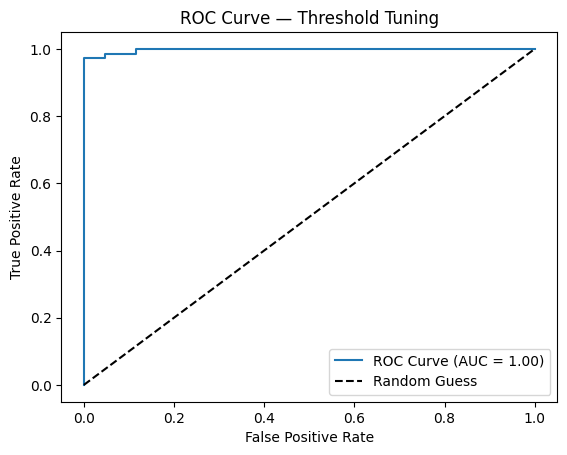

In [4]:
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Threshold Tuning')
plt.legend()